### Data Loading and Preparation

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib import colors 
import seaborn as sns 

import json


##### Loading JSON data

In [25]:
base_path = '/Users/zak/ArcPrize2025/arc-prize-2025/'

def load_json(file_path):
    with open(file_path, "r") as f: 
        data = json.load(f)


    return data

#### Reading files: 

In [28]:
training_challenges = load_json(base_path +'arc-agi_training_challenges.json')
training_solutions    = load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json(base_path +'arc-agi_evaluation_solutions.json')

In [44]:
training_challenges["00576224"]

{'train': [{'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]},
  {'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]}],
 'test': [{'input': [[3, 2], [7, 8]]}]}

In [45]:
training_challenges["00576224"]["train"]

[{'input': [[7, 9], [4, 3]],
  'output': [[7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3],
   [9, 7, 9, 7, 9, 7],
   [3, 4, 3, 4, 3, 4],
   [7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3]]},
 {'input': [[8, 6], [6, 4]],
  'output': [[8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4],
   [6, 8, 6, 8, 6, 8],
   [4, 6, 4, 6, 4, 6],
   [8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4]]}]

In [46]:
training_challenges["00576224"]["train"][0]

{'input': [[7, 9], [4, 3]],
 'output': [[7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3],
  [9, 7, 9, 7, 9, 7],
  [3, 4, 3, 4, 3, 4],
  [7, 9, 7, 9, 7, 9],
  [4, 3, 4, 3, 4, 3]]}

In [70]:
training_challenges["00576224"]["train"][0]

KeyError: 'train'

In [47]:
training_challenges["00576224"]["train"][1]

{'input': [[8, 6], [6, 4]],
 'output': [[8, 6, 8, 6, 8, 6],
  [6, 4, 6, 4, 6, 4],
  [6, 8, 6, 8, 6, 8],
  [4, 6, 4, 6, 4, 6],
  [8, 6, 8, 6, 8, 6],
  [6, 4, 6, 4, 6, 4]]}

In [48]:
training_challenges["00576224"]["train"][0]["input"]

[[7, 9], [4, 3]]

In [49]:
training_challenges["00576224"]["train"][0]["input"][1]

[4, 3]

In [50]:
len(training_challenges)

1000

In [51]:
# Get a list of all challenge IDs
challenge_ids = list(training_challenges.keys())
print(f"First 5 challenge IDs: {challenge_ids[:5]}")

First 5 challenge IDs: ['00576224', '007bbfb7', '009d5c81', '00d62c1b', '00dbd492']


In [52]:
# Check structure of a single challenge
sample_id = challenge_ids[0]
print(f"Structure of challenge {sample_id}:")
print(training_challenges[sample_id].keys())

Structure of challenge 00576224:
dict_keys(['train', 'test'])


In [53]:
# Count training examples per challenge
training_examples_counts = {}
for challenge_id, challenge_data in training_challenges.items():
    if 'train' in challenge_data:
        training_examples_counts[challenge_id] = len(challenge_data['train'])


In [ ]:
training_challenges["00576224"]["train"]

[{'input': [[7, 9], [4, 3]],
  'output': [[7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3],
   [9, 7, 9, 7, 9, 7],
   [3, 4, 3, 4, 3, 4],
   [7, 9, 7, 9, 7, 9],
   [4, 3, 4, 3, 4, 3]]},
 {'input': [[8, 6], [6, 4]],
  'output': [[8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4],
   [6, 8, 6, 8, 6, 8],
   [4, 6, 4, 6, 4, 6],
   [8, 6, 8, 6, 8, 6],
   [6, 4, 6, 4, 6, 4]]}]

Function to plot input/output pairs of a task

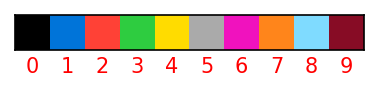

In [56]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap( ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])

norm = colors.Normalize(vmin =0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.tick_params(axis= "x", colors= "r", length= 0, grid_color= "none")

plt.show()

In [79]:
def plot_task(task, task_solutions, i, t, size= 2.5, w1= 0.9):
    t = list(training_challenges)[i]
    titleSize = 16
    num_train = len(task["train"])
    num_test = len(task["test"])

    wn = num_train + num_test
    fig, axs = plt.subplots(2, wn, figsize=(size*wn, 2* size))
    plt.suptitle(f"Task # {i}, {t}", fontsize= titleSize, fontweight= "bold", y=1, color = '#eeeeee')


    ''''train'''
    for j in range(num_train):
        plot_one(axs[0,j], j,task, "train", "input", w = w1)
        plot_one(axs[1,j], j,task, "train", "output", w = w1)

    ''''test'''
    for k in range(num_test):
        plot_one(axs[0, j+k+1], k, task, "test", "input", w = w1)
        task["test"][k]["output"] = task_solutions[k]
        plot_one(axs[1, j+k+1], k, task, "test", "output", w = w1)

    
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, wn])

    '''Separators'''

    colorSeparator = "white"

    for m in range(1, wn):
        axs[1, j+1].plot([m,m], [0,1], "--", linewidth= 1, color= colorSeparator)
    axs[1, j+1].plot([num_train, num_train], [0,1], "--", linewidth= 3, color= colorSeparator)

    axs[1, j+1].axis("off")

    """Frame and Background"""

    fig.patch.set_linewidth(5) #widthframe 
    fig.patch.set_edgecolor(colorSeparator) #colorframe
    fig.patch.set_facecolor("#444444") #background

    plt.tight_layout()

    print(f"#{i}, {t}")
    plt.show()




def plot_one(ax, i, task, train_or_test, input_or_output, solution= None, w= 0.8):
    fs = 12
    input_matix =  task[train_or_test][i][input_or_output]
    ax.imshow(input_matix, cmap=cmap, norm=norm)

    #ax.grid(True,which='both', color='lightgrey', linewidth=1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1+ len(input_matix[0]))])
    ax.set_yticks([x-0.5 for x in range(1+ len(input_matix))])

    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs, color = '#dddddd')

    



    

    














### **Visualizing Training set**

000- 100 tasks

#0, 00576224


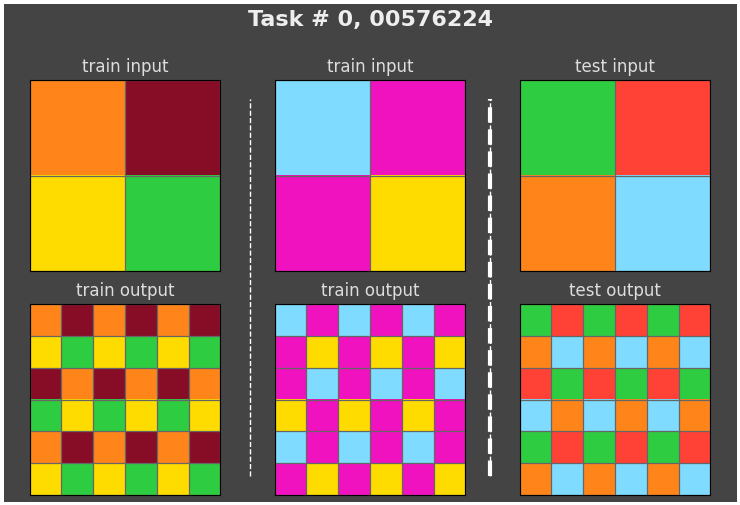

#1, 007bbfb7


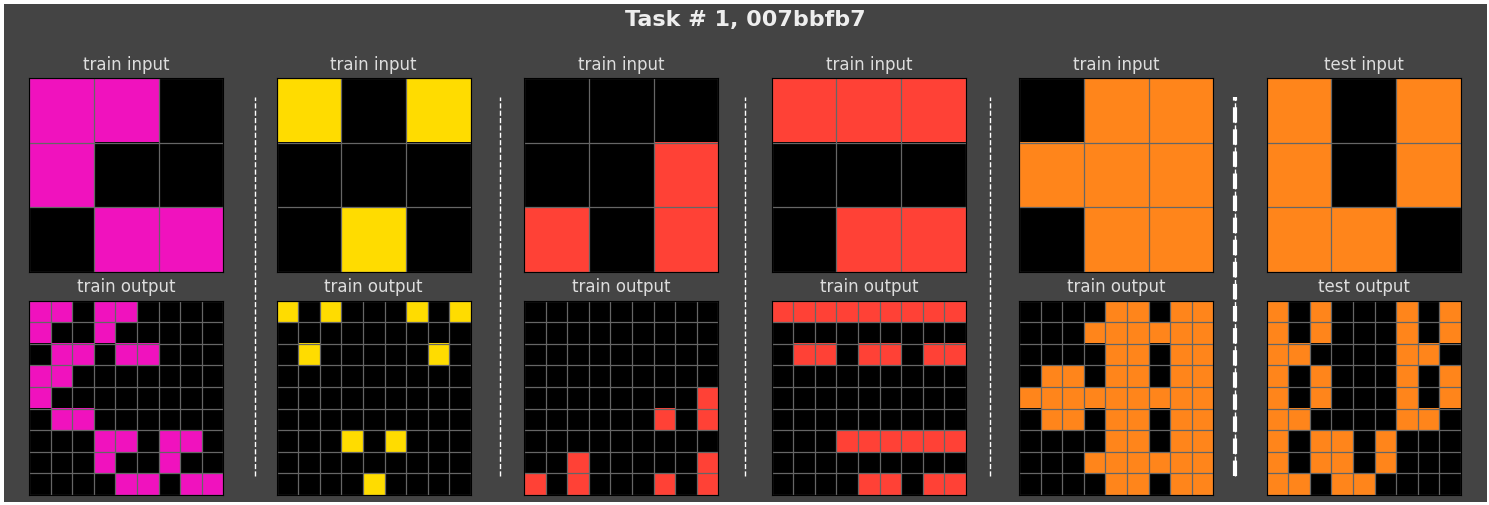

#2, 009d5c81


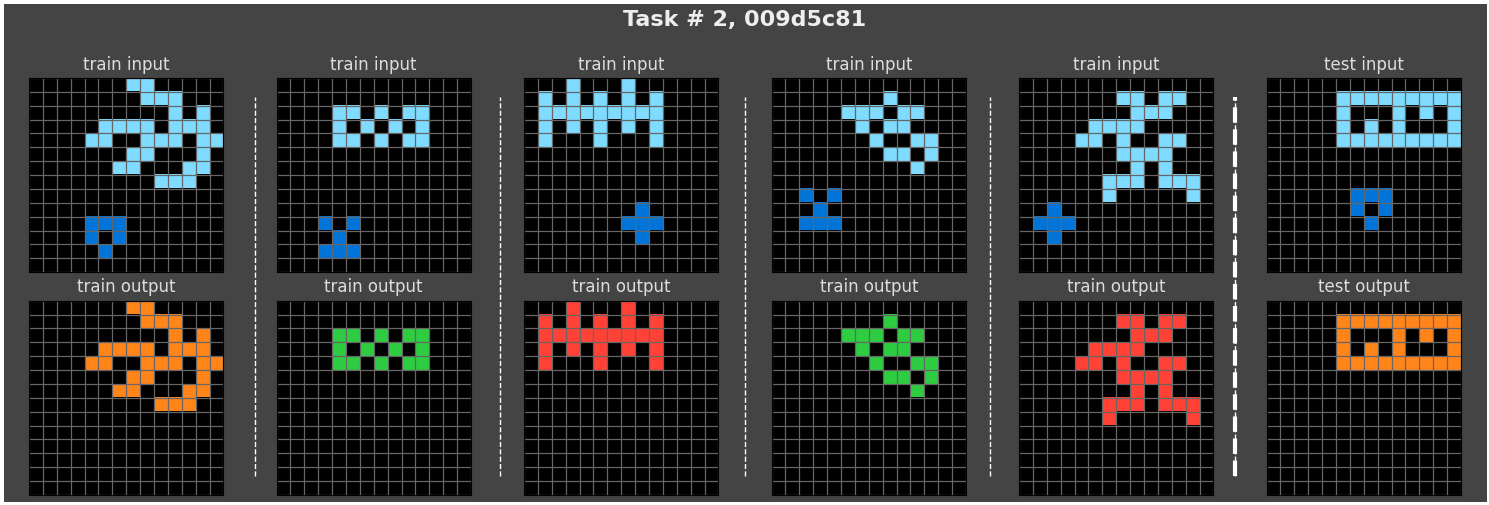

In [81]:
for i in range(0, 3):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    task_solution = training_solutions[t]
    plot_task(task, task_solution, i, t)

### **Visualizing Evaluation set**

tasks 0- 120 


#0, 00576224


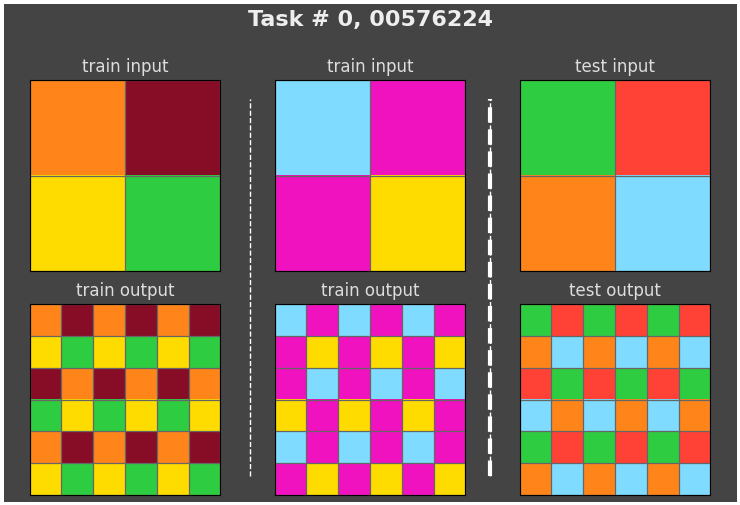

#1, 007bbfb7


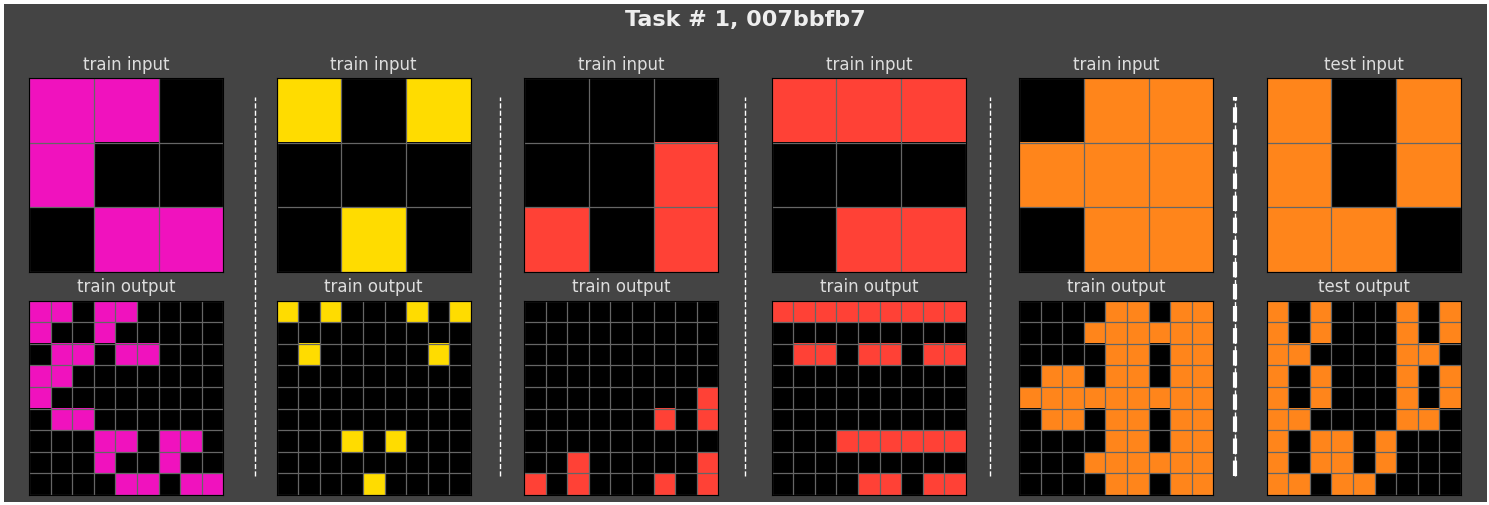

#2, 009d5c81


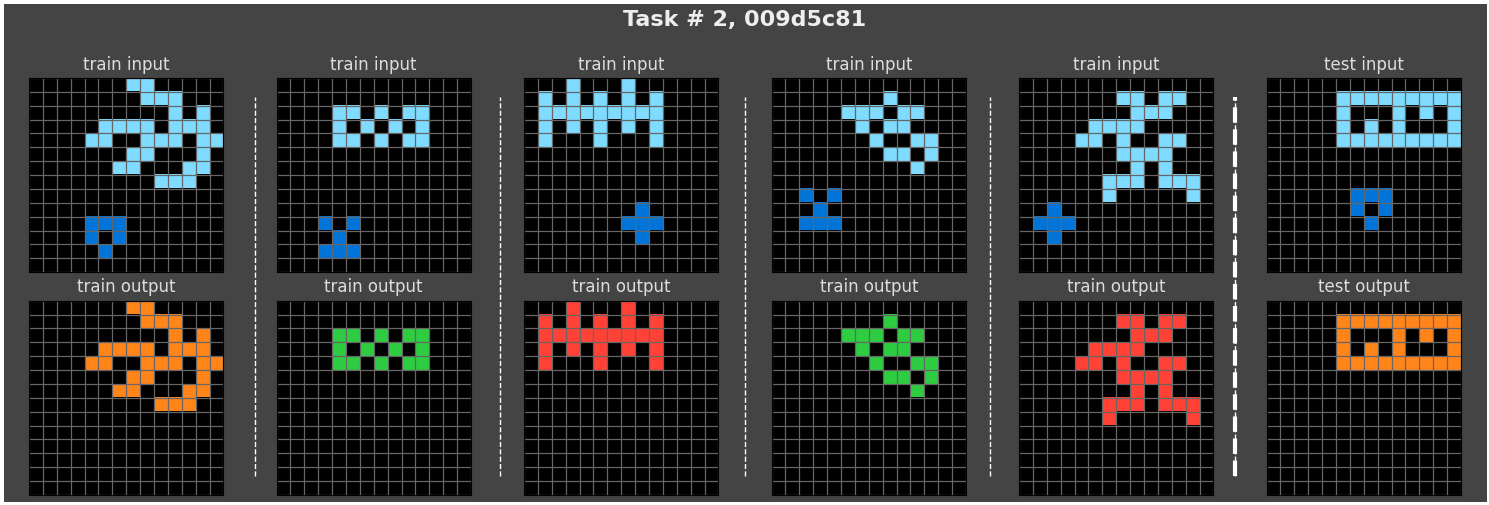

#3, 00d62c1b


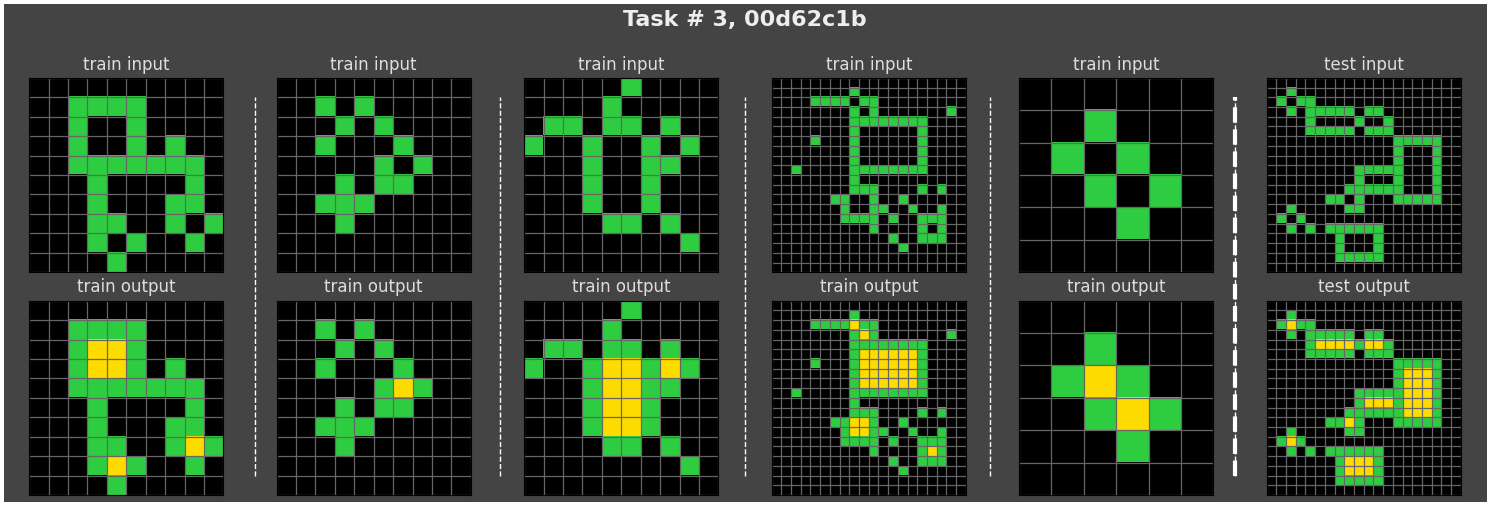

#4, 00dbd492


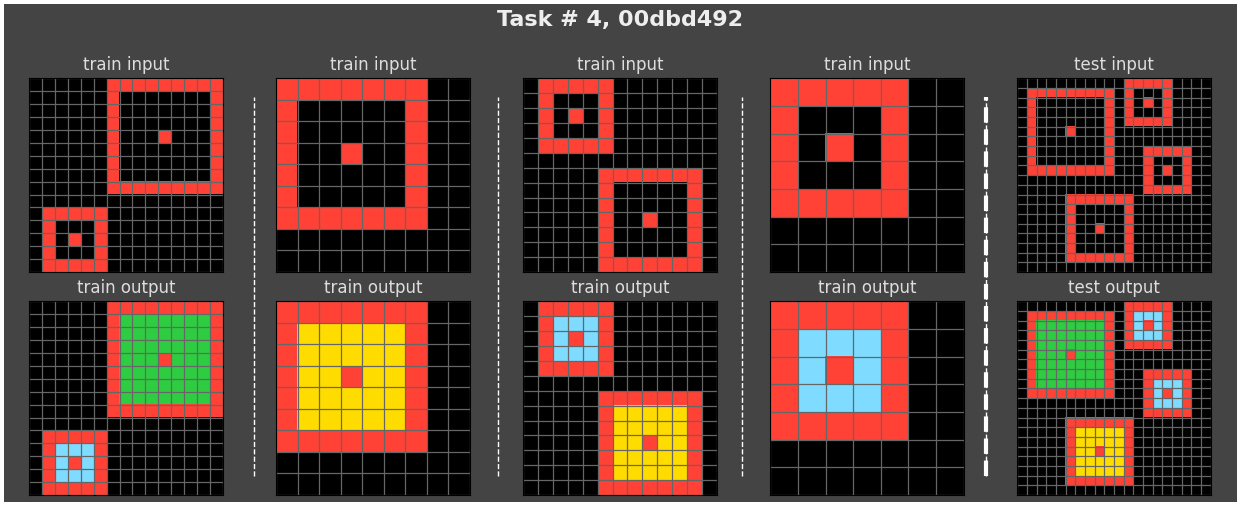

In [83]:
for i in range(0, 5): 
   t = list(training_challenges)[i]
   task = training_challenges[t]
   task_solution = training_solutions[t]
   plot_task(task, task_solution, i , t)

In [84]:
lisst1 = list(evaluation_challenges)
for i in lisst1: 
    t = i 

    #print(t)

#lisst1


In [91]:
def fast_plot(i, s=1.5):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    task_solution = training_solutions[t]
    plot_task(task, task_solution, i, t,s, w1 = 0.3)

def fastask(i):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    return task 

def fastask_solution(i):
    t = list(training_challenges)[i]
    task = training_challenges[t]
    task_solution = training_solutions[t]
    return task_solution


In [92]:
fastask(0)

{'train': [{'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]},
  {'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]}],
 'test': [{'input': [[3, 2], [7, 8]],
   'output': [[3, 2, 3, 2, 3, 2],
    [7, 8, 7, 8, 7, 8],
    [2, 3, 2, 3, 2, 3],
    [8, 7, 8, 7, 8, 7],
    [3, 2, 3, 2, 3, 2],
    [7, 8, 7, 8, 7, 8]]}]}

In [93]:
fastask_solution(0)

[[[3, 2, 3, 2, 3, 2],
  [7, 8, 7, 8, 7, 8],
  [2, 3, 2, 3, 2, 3],
  [8, 7, 8, 7, 8, 7],
  [3, 2, 3, 2, 3, 2],
  [7, 8, 7, 8, 7, 8]]]

#0, 00576224


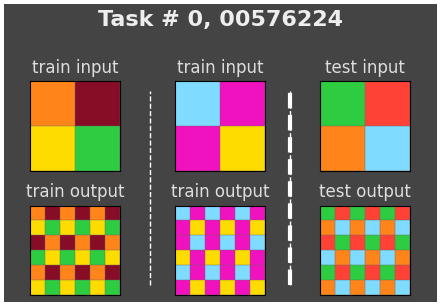

In [94]:
fast_plot(0)

### Feature Extraction


In [95]:
def get_objects(task):
    x , y = [], []
    for obj in task["train"]:
        x.append(np.array(obj["input"]))
        y.append(np.array(obj["output"]))
    
    return x, y

In [101]:
i = 43
task = fastask(i)
#get_objects(task)

#800, d017b73f


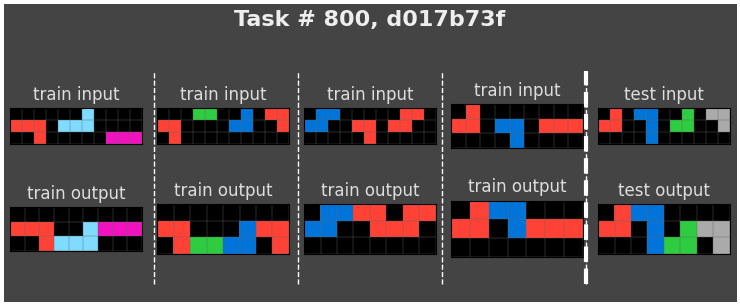

False

In [104]:
def isSameSizeInout(task): 
    return all ([np.shape(x) == np.shape(y) for x, y in zip(*get_objects(task))])


i = 800
task = fastask(i)
fast_plot(i, s= 1.5)
isSameSizeInout(task)

Dimension for the last train exmple

As already said, only makes sense if all The In's are the same size. 

at this point maybe a good idea to add new funcktion to check if all the inputs are the same size or not
also another function to check if all the outputs are the same size or not
so when we check the following functions, we either return the last s if all the inputs are the same size or we
we return all shapes as list.

something like this:

'''

def widthIN(task):
    if isSameSizeInout():
        for x ,y in zip(*get_objects(task)):
            s = np.shape(x)[1]

        return s
    else:
        for x ,y in zip(*get_objects(task)):
                s = np.shape(x)[1]
                print(s)


'''

In [105]:
# Width in 

def widthIN(task):
    for x ,y in zip(*get_objects(task)):
        s = np.shape(x)[1]

    return s

'''Width Out'''
def widthOut(task):
    for x, y in zip(*get_objects(task)):
       s=  np.shape(y)[1] 
    return s

'''High In'''
def highIn(task):
    for x, y in zip(*get_objects(task)):
       s=  np.shape(x)[0] 
    return s

'''High Out'''
def highOut(task):
    for x, y in zip(*get_objects(task)):
       s=  np.shape(y)[0] 
    return s






#29, 0c9aba6e


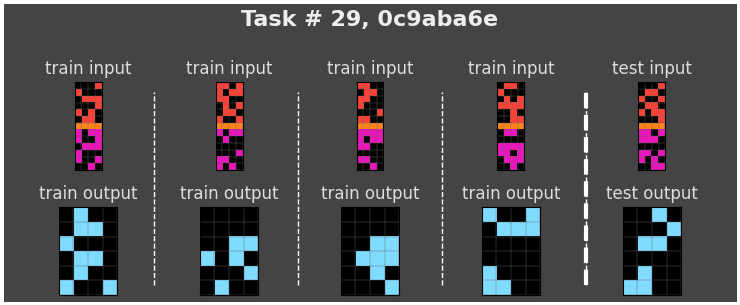

(4, 13, 4, 6)

In [108]:
i = 29
task1 = fastask(i)
fast_plot(i, s= 1.5)
widthIN(task), highIn(task), widthOut(task), highOut(task)
